In [257]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [258]:
import numpy as np
import pandas as pd

In [259]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [260]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [261]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [262]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [263]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [264]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [265]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [266]:
# Look at the column headers and first row data of 'measurement' class 
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121b41210>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08}

In [267]:
# Look at the column headers and first row data of 'station' class 
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x121eb9350>,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168}

In [268]:
# Calculate the date 1 year ago from the last data point in the database
last_date_tuple = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
date_time_str = last_date_tuple[0]
last_date = dt.datetime.strptime(date_time_str, '%Y-%m-%d')
print(last_date.date()-dt.timedelta(days=365))

2016-08-23


In [269]:
# Perform a query to retrieve the date and precipitation scores 
results_q1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.prcp != 'None').order_by(Measurement.date.desc()).\
    filter(Measurement.date >= (last_date.date()-dt.timedelta(days=365))).\
    all()

for row in results_q1:
    print(row)

('2017-08-23', 0.0)
('2017-08-23', 0.0)
('2017-08-23', 0.08)
('2017-08-23', 0.45)
('2017-08-22', 0.0)
('2017-08-22', 0.0)
('2017-08-22', 0.5)
('2017-08-21', 0.0)
('2017-08-21', 0.02)
('2017-08-21', 0.56)
('2017-08-20', 0.0)
('2017-08-20', 0.01)
('2017-08-19', 0.0)
('2017-08-19', 0.0)
('2017-08-19', 0.09)
('2017-08-18', 0.0)
('2017-08-18', 0.0)
('2017-08-18', 0.06)
('2017-08-17', 0.0)
('2017-08-17', 0.05)
('2017-08-17', 0.01)
('2017-08-17', 0.13)
('2017-08-16', 0.0)
('2017-08-16', 0.07)
('2017-08-16', 0.12)
('2017-08-16', 0.42)
('2017-08-15', 0.02)
('2017-08-15', 0.0)
('2017-08-15', 0.06)
('2017-08-15', 0.32)
('2017-08-15', 0.42)
('2017-08-14', 0.0)
('2017-08-14', 0.01)
('2017-08-14', 0.08)
('2017-08-14', 0.0)
('2017-08-14', 0.22)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-13', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.0)
('2017-08-12', 0.14)
('2017-08-11', 0.0)
('2017-08-11', 0.0)
('2017-08-11', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.0)
('2017-08-10', 0.07

In [270]:
# Unpack tuples using list comprehensions
date_list = [result[0] for result in results_q1]
date_list

['2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-22',
 '2017-08-22',
 '2017-08-22',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-20',
 '2017-08-20',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-12',
 '2017-08-12',
 '2017-08-12',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-09',
 '2017-08-09',
 '2017-08-09',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-06',
 '2017-08-06',
 '2017-08-06',
 '2017-08-06',
 '2017-08-05',
 '2017-08-05',
 '2017-08-

In [271]:
# Unpack tuples using list comprehensions
prcp_list = [result[1] for result in results_q1]
prcp_list

[0.0,
 0.0,
 0.08,
 0.45,
 0.0,
 0.0,
 0.5,
 0.0,
 0.02,
 0.56,
 0.0,
 0.01,
 0.0,
 0.0,
 0.09,
 0.0,
 0.0,
 0.06,
 0.0,
 0.05,
 0.01,
 0.13,
 0.0,
 0.07,
 0.12,
 0.42,
 0.02,
 0.0,
 0.06,
 0.32,
 0.42,
 0.0,
 0.01,
 0.08,
 0.0,
 0.22,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.07,
 0.0,
 0.0,
 0.15,
 0.0,
 0.1,
 0.0,
 0.34,
 0.0,
 0.0,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.06,
 0.02,
 0.04,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.06,
 0.0,
 0.05,
 0.0,
 0.25,
 0.02,
 0.12,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3,
 0.0,
 0.06,
 0.02,
 0.0,
 0.23,
 0.3,
 0.0,
 0.13,
 0.14,
 0.01,
 0.0,
 0.09,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.06,
 0.02,
 0.0,
 0.12,
 0.3,
 0.0,
 0.03,
 0.12,
 0.0,
 0.05,
 0.11,
 0.3,
 0.05,
 0.58,
 1.19,
 0.61,
 0.84,
 0.0,
 0.06,
 0.07,
 0.2,
 0.8,
 0.03,
 0.07,
 0.12,
 0.0,
 0.2,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.1,
 0.03,
 0.12,
 0.0,
 0.0,
 0.33,
 0.06,
 0.7,
 0.0,
 0.09,
 0.0,

In [272]:
# Create a dictionary of lists and create pandas dataframe from it.
d = {}
d["Date"] = date_list
d["Precipitation"] = prcp_list
df = pd.DataFrame(d)

In [273]:
sorted_df = df.sort_values("Date", ascending=True)	
indexed_df = sorted_df.set_index("Date")
indexed_df

,Precipitation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


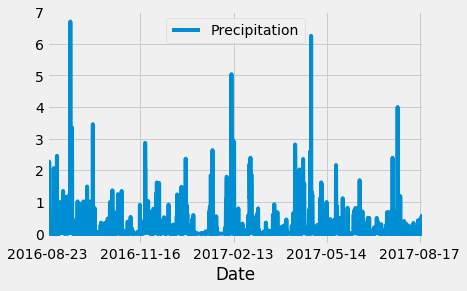

In [274]:
indexed_df.plot()

![precipitation](Images/precipitation.png)

In [275]:
# Use Pandas to calcualte the summary statistics for the precipitation data
indexed_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [276]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).\
    group_by(Station.station).count()
station_count

9

In [277]:
#List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
station_activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [278]:
most_active_id = station_activity[0][0]
most_active_id

'USC00519281'

In [279]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = session.query(Station.name, func.count(Measurement.station)).\
    outerjoin(Station, Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
most_active

('WAIHEE 837.5, HI US', 2772)

In [280]:
# What are the least active stations? (i.e. what stations have the least rows)?
least_active = session.query(Station.name, func.count(Measurement.station)).\
    outerjoin(Station, Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).asc()).first()
least_active

('UPPER WAHIAWA 874.3, HI US', 511)

In [281]:
# Perform a query to retrieve the dates and tobs for most active station
results_q2 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active_id).\
    filter(Measurement.tobs != 'None').order_by(Measurement.date.desc()).\
    filter(Measurement.date >= (last_date.date()-dt.timedelta(days=365))).\
    all()
for row in results_q2:
    print(row)

('2017-08-18', 79.0)
('2017-08-17', 76.0)
('2017-08-16', 76.0)
('2017-08-15', 77.0)
('2017-08-14', 77.0)
('2017-08-13', 77.0)
('2017-08-06', 83.0)
('2017-08-05', 82.0)
('2017-08-04', 77.0)
('2017-07-31', 76.0)
('2017-07-30', 81.0)
('2017-07-29', 82.0)
('2017-07-28', 81.0)
('2017-07-27', 76.0)
('2017-07-26', 75.0)
('2017-07-25', 77.0)
('2017-07-24', 75.0)
('2017-07-23', 82.0)
('2017-07-22', 77.0)
('2017-07-21', 77.0)
('2017-07-20', 77.0)
('2017-07-19', 76.0)
('2017-07-18', 76.0)
('2017-07-17', 76.0)
('2017-07-16', 80.0)
('2017-07-15', 80.0)
('2017-07-14', 76.0)
('2017-07-13', 74.0)
('2017-07-12', 74.0)
('2017-07-11', 72.0)
('2017-07-10', 69.0)
('2017-07-09', 78.0)
('2017-07-08', 78.0)
('2017-07-07', 75.0)
('2017-07-06', 74.0)
('2017-07-05', 77.0)
('2017-07-04', 78.0)
('2017-07-03', 76.0)
('2017-07-02', 81.0)
('2017-07-01', 79.0)
('2017-06-30', 76.0)
('2017-06-29', 76.0)
('2017-06-28', 77.0)
('2017-06-27', 76.0)
('2017-06-26', 73.0)
('2017-06-25', 71.0)
('2017-06-24', 77.0)
('2017-06-23'

In [282]:
# Unpack tuples using list comprehensions
date_list1 = [result[0] for result in results_q2]
tobs_list = [result[1] for result in results_q2]

# Create a dictionary of lists 
d1 = {}
d1["Date"] = date_list1
d1["tobs"] = tobs_list

# Create a pandas df and display 
most_active_temps_df = pd.DataFrame(d1)
most_active_temps_df.head()

,Date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


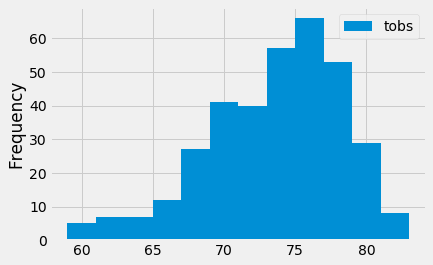

In [283]:
# Plot the temperature data from the df1 into 
most_active_temps_df.plot.hist(bins=12)

In [284]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),\
    func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_id).all()



[(54.0, 85.0, 71.66378066378067)]

In [226]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [245]:
def calc_temps(start_date, end_date):
    #TMIN, TAVG, and TMAX for a list of dates.   
    start = dt.datetime.strptime(start_date, '%Y-%m-%d')
    end = dt.datetime.strptime(end_date, '%Y-%m-%d')
    
    results_q4 = session.query(func.min(Measurement.tobs),\
        func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.tobs != 'None').order_by(Measurement.date.desc()).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).\
        all()
    
    tobs_stats = []
    for min_tobs, avg_tobs, max_tobs in results_q4:
        tobs_dict = {}
        tobs_dict["TMIN"] = results_q4[0][0]
        tobs_dict["TAVE"] = results_q4[0][1]
        tobs_dict["TMAX"] = results_q4[0][2]
        tobs_stats.append(tobs_dict)
    return tobs_stats
    
print(calc_temps('2012-02-28', '2012-03-05'))

[{'TMIN': 62.0, 'TAVE': 69.4375, 'TMAX': 74.0}]


In [244]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-02-28', '2012-03-05'))


[{'TMIN': 61.0, 'TAVE': 70.2, 'TMAX': 75.0}]


In [246]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2011-02-28', '2011-03-05')


[{'TMIN': 61.0, 'TAVE': 69.775, 'TMAX': 74.0}]

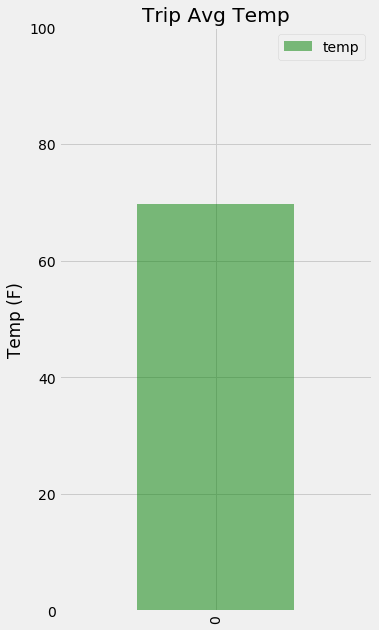

In [192]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


# x = [calc_temps('2011-02-28', '2011-03-05')[0][1]]
ind = np.arange(len(temps))
df_temp = pd.DataFrame({'temp':x})
df_temp.plot(kind="bar", color="g", alpha = 0.5, figsize=(5,10))
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.ylim(0, 100)
plt.show()

# yerror = [calc_temps('2011-02-28', '2011-03-05')[0][0], calc_temps('2011-02-28', '2011-03-05')[0][2]]
# plt.errorbar(x, y, yerr=yerror)




In [196]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    outerjoin(Station, Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()


[('MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1068.0899999999956),
 ('WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  588.6399999999976),
 ('KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 382.61999999999847),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  295.67999999999944),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  234.49000000000026),
 ('WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 131.62000000000063),
 ('HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  92.68000000000006),
 ('UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 70.87000000000005),
 ('PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 43.44000000000002)]

## Optional Challenge Assignment

In [254]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [256]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
trip_start = '04-12-2017'
trip_end = '04-16-2017'

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(58.0, 69.98148148148148, 77.0)]


[(60.0, 67.89090909090909, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


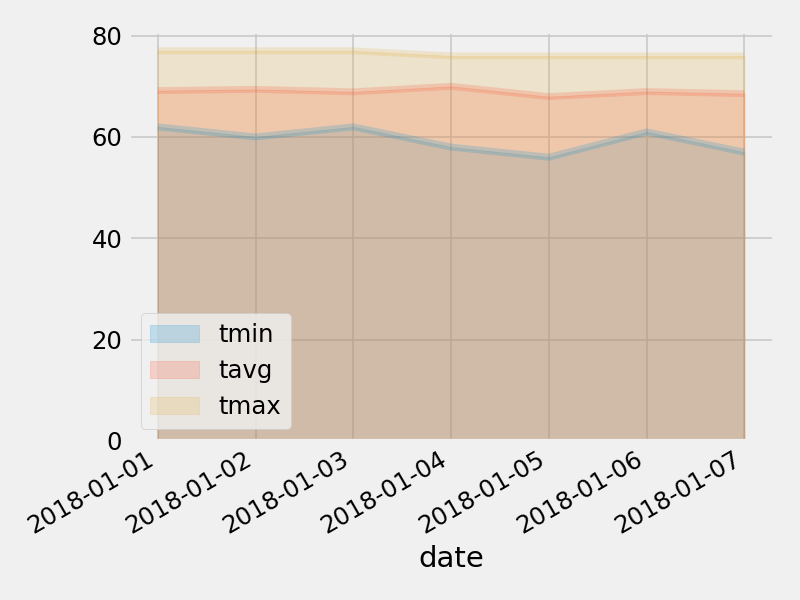

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
